In [10]:
library(keras)
library(mlbench)
library(plyr);
library(dplyr)
library(magrittr)
library(neuralnet)
library(lubridate)
library(ade4)
library(data.table)
library(tidyquant)
library(tidyverse)
suppressWarnings
suppressMessages



function (expr) 
{
    ops <- options(warn = -1)
    on.exit(options(ops))
    withCallingHandlers(expr, warning = function(w) invokeRestart("muffleWarning"))
}
<bytecode: 0x564969a7bde0>
<environment: namespace:base>

function (expr) 
withCallingHandlers(expr, message = function(c) invokeRestart("muffleMessage"))
<bytecode: 0x56496c3ec1f8>
<environment: namespace:base>

In [11]:
data <- read.fwf("../input/schillingData.txt",
         widths= c(1,1,1,1,1,1,1,1,-1,1),
         col.names=c("Amino1","Amino2","Amino3","Amino4","Amino5","Amino6","Amino7","Amino8","CleaveCenter"),
         strip.white=TRUE)

In [12]:
data1 <- as.data.frame(data)
data1$Amino1 <- as.numeric(as.factor(data1$Amino1))
data1$Amino2 <- as.numeric(as.factor(data1$Amino2))
data1$Amino3 <- as.numeric(as.factor(data1$Amino3))
data1$Amino4 <- as.numeric(as.factor(data1$Amino4))
data1$Amino5 <- as.numeric(as.factor(data1$Amino5))
data1$Amino6 <- as.numeric(as.factor(data1$Amino6))
data1$Amino7 <- as.numeric(as.factor(data1$Amino7))
data1$Amino8 <- as.numeric(as.factor(data1$Amino8))
data1


Amino1,Amino2,Amino3,Amino4,Amino5,Amino6,Amino7,Amino8,CleaveCenter
1,1,1,1,1,13,1,9,0
1,1,1,1,13,1,9,18,0
1,1,1,4,10,6,1,15,0
1,1,1,13,1,9,18,4,0
1,1,1,13,18,1,1,1,0
1,1,1,13,18,18,13,14,0
1,1,1,17,17,1,1,13,0
1,1,3,11,10,6,16,20,0
1,1,4,8,4,6,1,6,0
1,1,4,10,4,11,4,10,0


In [13]:
# Set test/training sets
set.seed(1234) 
ind <- sample(2, nrow(data1), replace = T, prob = c(.7, .3)) 
training <- data1[ind==1,1:8] 
test <- data1[ind==2, 1:8] 
trainingtarget <- data1[ind==1, 9] 
testtarget <- data1[ind==2, 9]

In [14]:
# Create Model
model_keras <- keras_model_sequential()

model_keras %>% 
    # First hidden layer
    layer_dense(
        units              = 512, 
        activation = "relu",
        input_shape        = 8) %>% 
layer_dropout(rate = 0.4) %>% 
#second layer
  layer_dense(
        units              = 256, 
        activation         = "relu",
)%>%
layer_dropout(rate = 0.4) %>% 
# Output layer
    layer_dense(
        units              = 1, 
        activation         = "sigmoid") %>% 
    # Compile ANN
    compile(
        optimizer = 'adam',
        loss      = 'binary_crossentropy',
        metrics   = 'accuracy'
    )
model_keras

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_4 (Dense)                     (None, 512)                     4608        
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 512)                     0           
________________________________________________________________________________
dense_5 (Dense)                     (None, 256)                     131328      
________________________________________________________________________________
dropout_4 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_6 (Dense)                     (None, 1)                       257         
Total params: 136,193
Trainable params: 136,193
Non-trainable params: 0
_______________________________

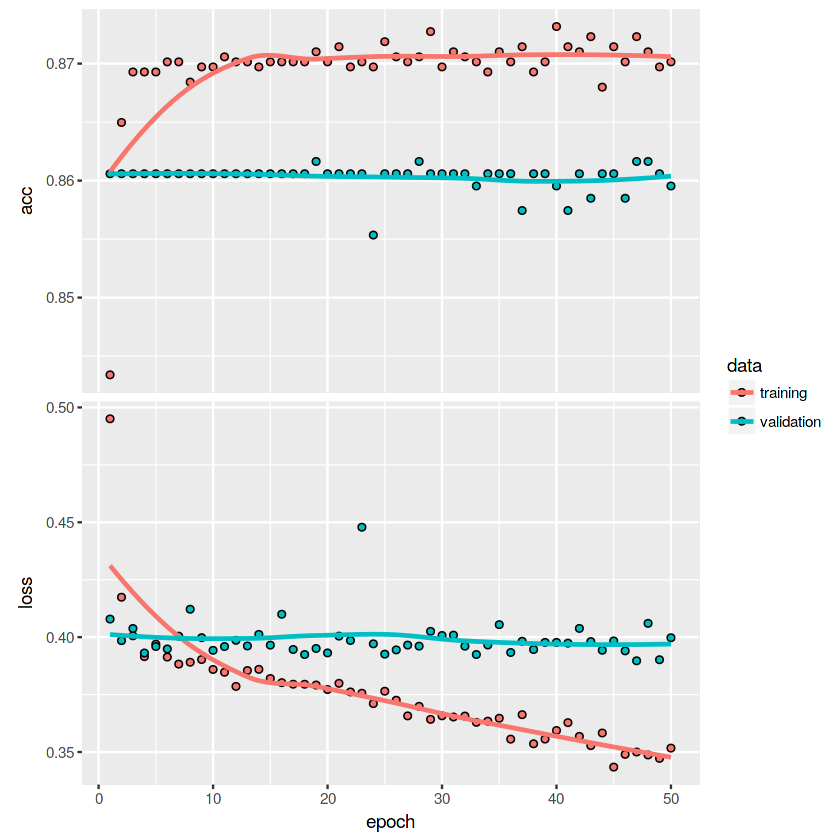

In [15]:
test_X2 <- as.matrix(test)
testtarget_X2 <- as.matrix(testtarget)
# Fitting the model
fit_keras <- fit(
    object           = model_keras, 
    x                = as.matrix(training), 
    y                = as.matrix(trainingtarget),
    batch_size       = 8, 
    epochs           = 50,
    validation_data = list(test_X2, testtarget_X2)
    )
plot(fit_keras)

In [16]:
fit_keras

Trained on 2,318 samples, validated on 954 samples (batch_size=8, epochs=50)
Final epoch (plot to see history):
     acc: 0.8701
    loss: 0.3517
 val_acc: 0.8595
val_loss: 0.3997 